# NMOS Small-Sinal

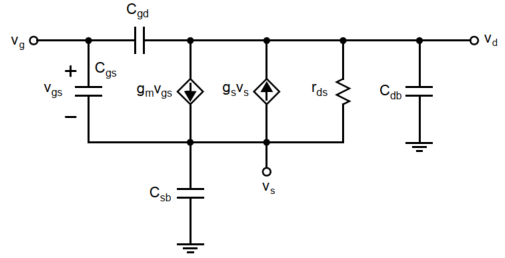

In [350]:
import numpy as np
import scipy as sci
import sympy as sym

gm = 1
gs = 1
rds = 50

cgd = 1e-9
cgs = 1e-12
csb = 1e-12*0
cdb = 1e-9

zgs = 1/(s*cgs)
zgd = 1/(s*cgd)
#zsb = 1/(s*csb)*0
zdb = 1/(s*cdb)

s = sym.Symbol('s')

In [351]:
G = sym.Matrix(([1/zgd+1/zgs, -1/zgd, -1/zgs, -1, 0]
             ,[-1/zgd+gm, 1/zgd+1/rds+1/zdb, -1/rds-gm-gs, 0, 0]
             ,[-1/zgs-gm, -1/rds, 1/zgs+1/rds+gm+gs, 0, -1]
               ,[1, 0, 0, 0, 0]
               ,[0, 0, 1, 0, 0]))
G

Matrix([
[    1.001e-9*s,       -1.0e-9*s,       -1.0e-12*s, -1,  0],
[  1 - 1.0e-9*s, 2.0e-9*s + 0.02,            -2.02,  0,  0],
[-1.0e-12*s - 1,           -0.02, 1.0e-12*s + 2.02,  0, -1],
[             1,               0,                0,  0,  0],
[             0,               0,                1,  0,  0]])

In [342]:
G_inv = G.inv()
A = sym.simplify(G_inv*B)
tf = TransferFunctionMatrix.from_Matrix(A, s)
tf

TransferFunctionMatrix(((TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(1, 1, s), TransferFunction(0, 1, s)), (TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(2.0e-11*s - 0.02, 4.0e-11*s + 0.0004, s), TransferFunction(0, 1, s)), (TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s)), (TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(s*(2.004e-20*s + 2.04004e-11), 4.0e-11*s + 0.0004, s), TransferFunction(0, 1, s)), (TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(0, 1, s), TransferFunction(s*(-2.0e-21*s - 2.02002e-9), 2.0e-9*s + 0.02, s), TransferFunction(0, 1, s))))

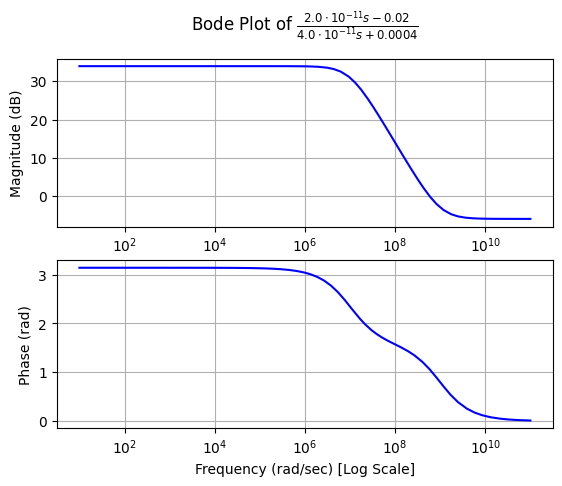

In [344]:
bode_plot(tf[1,3], initial_exp=1, final_exp=11)

# LDO Small-Signal

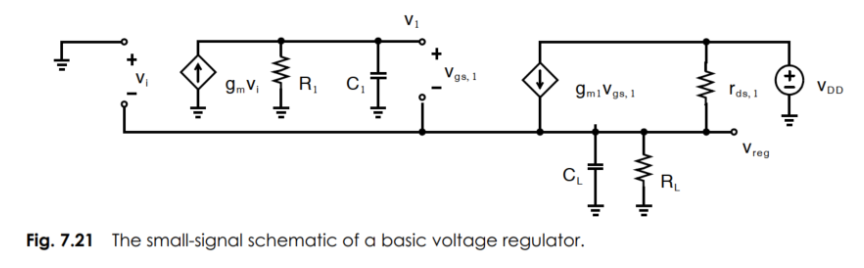

In [8]:
import numpy as np
import scipy as sci
import sympy as sym
import matplotlib.pyplot as plt

from sympy.physics.control.lti import TransferFunctionMatrix
from sympy.physics.control.control_plots import bode_plot, pole_zero_plot, bode_magnitude_numerical_data, bode_phase_numerical_data, pole_zero_numerical_data

import symbolic_solver as ss

s = sym.Symbol('s')

## OTA params
roa = 50
gm = 10
c1 = 10e-8
z1 = 1/(s*c1)

## LDO params
gm1 = 0.0063
rds = 1/4e-5
gds = 1/rds
r1 = 100000
r2 = 200000

## LOAD
rL = 1800
cL = 10e-12
zL = 1/(s*cL)

In [9]:
cgs = 1.53e-9
cgd = 1.55e-15

G_closedloop_parasitics = ss.G_matrix_with_parasitics(roa, gm, c1, gm1, r1, r2, rds, rL, cL, s, cgs, cgd)
G_openloop = ss.G_openloop(roa, gm, c1, gm1, r1, r2, rds, (rL*1/gds)/(rL+1/gds), cL, s, cgs)

B = np.array([0, 0, 0, 0, 1])
tf_closedloop_parasitics = ss.psr_tf(G_closedloop_parasitics, B)[1,4]
B = np.array([0, 0, 0, 1])
tf_openloop = ss.psr_tf(G_openloop, B)[1,3]

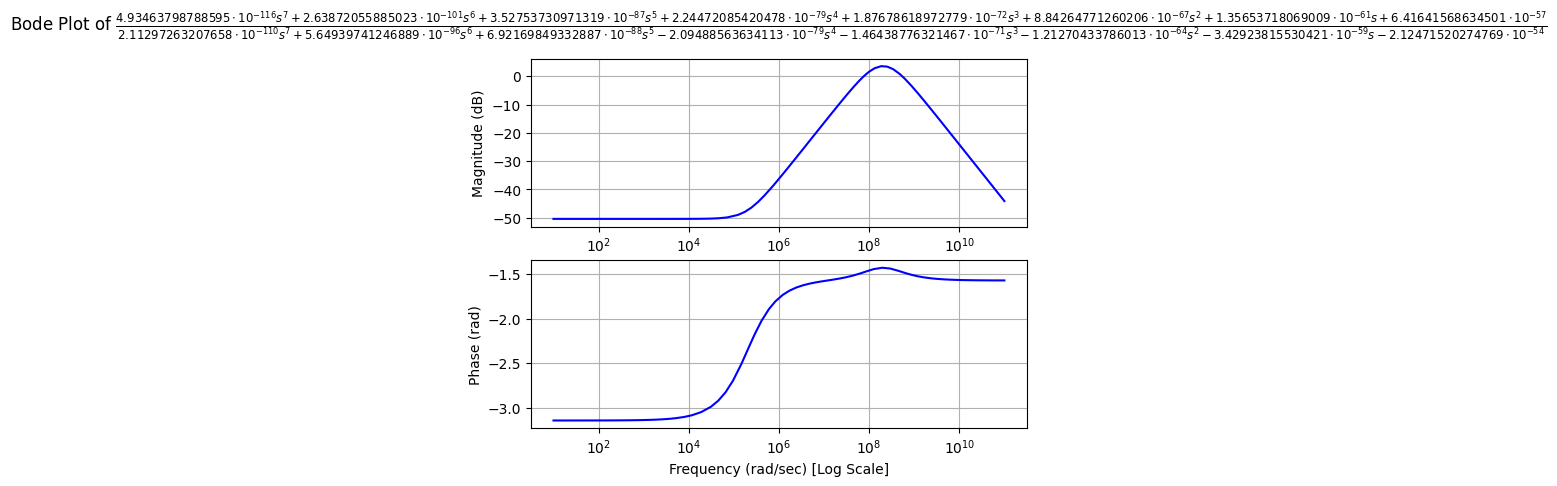

In [10]:
bode_plot(tf_closedloop_parasitics, initial_exp=1, final_exp=11)

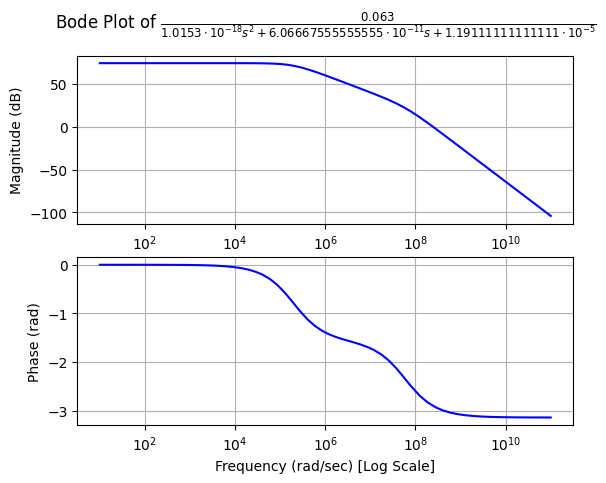

(array([], dtype=float64),
 array([-59555555.55555554+0.j,   -196986.11247907+0.j]))

In [86]:
bode_plot(tf_openloop, initial_exp=1, final_exp=11)
pole_zero_numerical_data(tf_openloop)

In [79]:
openloop_bode_data = np.array(bode_magnitude_numerical_data(tf_openloop, initial_exp=0.1, final_exp=11))
openloop_phase_data = np.array(bode_phase_numerical_data(tf_openloop, initial_exp=0.1, final_exp=11))

openloop_gain = openloop_bode_data[1][0]
print(openloop_gain)

74.4677654705457


In [80]:
x = 0
difference_array = np.absolute(openloop_bode_data[1])
# find the index of minimum element from the array
index = difference_array.argmin()

In [81]:
print(openloop_bode_data[0][index])
print(openloop_phase_data[1][index]*180/np.pi)

234326435.25098294
-160.34378625076678
